#### Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well 

The important parameters to tune in SVM are gamma, c and Kernel

* Kernel: linear or radial
* gamma: the free parameter of the Gaussian radial basis function. A small gamma means a Gaussian with a large variance so the influence of x_j is more, i.e. if x_j is a support vector, a small gamma implies the class of this support vector will have influence on deciding the class of the vector x_i even if the distance between them is large. If gamma is large, then variance is small implying the support vector does not have wide-spread influence. Technically speaking, large gamma leads to high bias and low variance models, and vice-versa.
* c: the parameter for the soft margin cost function, which controls the influence of each individual support vector; this process involves trading error penalty for stability. It also controls the trade off between smooth decision boundary and classifying the training points correctly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm, datasets

In [2]:
# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset 
## we can also plot it on 2d plane if we deal with 2d dataset
iris = datasets.load_iris()
y = iris.target
X = iris.data[:, :2] 

In [3]:
X.shape,y.shape

((150, 2), (150,))

In [4]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

In [6]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [8]:
Z.shape

(164, 208)

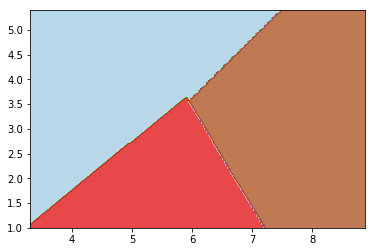

In [13]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.8)
##red is for class 1 brown for class2 and blue for class 0

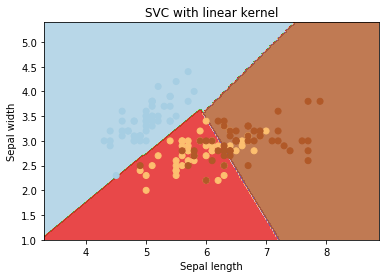

In [21]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y+100, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

In [35]:
# using radial 
svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

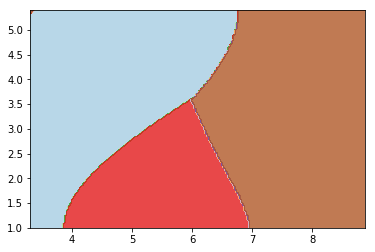

In [36]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

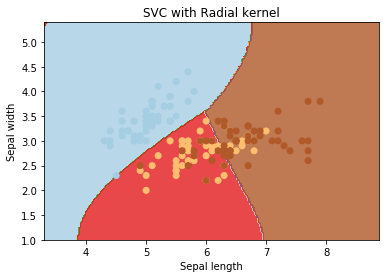

In [37]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial kernel')

In [39]:
##change value of gamma to 10
svc = svm.SVC(kernel='rbf', C=1,gamma=10.0).fit(X, y)

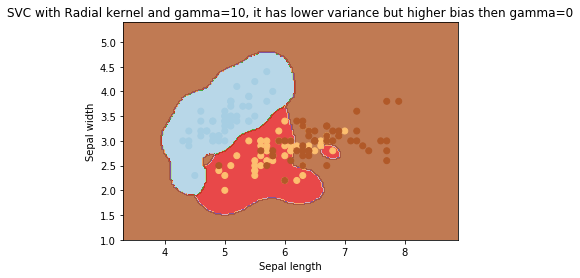

In [41]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial kernel and gamma=10, it has lower variance but higher bias then gamma=0')

In [42]:
##change value of gamma to 100
svc = svm.SVC(kernel='rbf', C=1,gamma=100.0).fit(X, y)

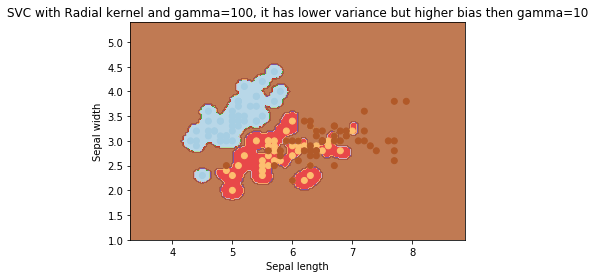

In [43]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial kernel and gamma=100, it has lower variance but higher bias then gamma=10')

In [45]:
##changing the value c
svc = svm.SVC(kernel='rbf', C=100,gamma='auto').fit(X, y)

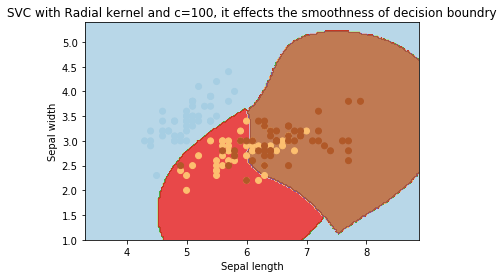

In [46]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial kernel and c=100, it effects the smoothness of decision boundry')

In [47]:
##changing the value c
svc = svm.SVC(kernel='rbf', C=1000,gamma='auto').fit(X, y)

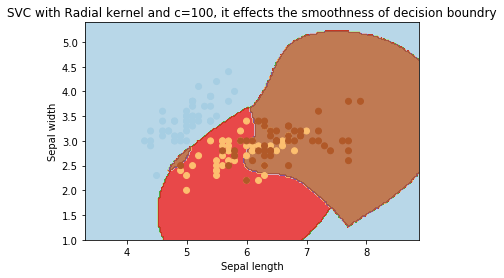

In [48]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with Radial kernel and c=100, it effects the smoothness of decision boundry')

### Pros and Cons associated with SVM
#### Pros:
* It works really well with clear margin of separation
* It is effective in high dimensional spaces.
* It is effective in cases where number of dimensions is greater than the number of samples.
* It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
#### Cons:
* It doesn’t perform well, when we have large data set because the required training time is higher
* It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping
* SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. It is related SVC method of Python scikit-learn library.